# `California Housing Price`

## `Background`

#### Housebiz is a prominent real estate company operating in various regions across the United States. With a focus on providing high-quality services to homebuyers and sellers, Housebiz relies on data-driven insights to make informed decisions and offer personalized solutions to their clients. To achieve this, they have collected a comprehensive dataset containing valuable information about housing attributes in California. This dataset includes features such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity. Leveraging the power of machine learning and regression analysis, Housebiz aims to gain valuable insights into the real estate market dynamics and factors influencing housing prices, helping them better serve their clients and make strategic business decisions.

## `Problem Statement`
#### Being competitive in the real estate business means we should generate profit to our company but also mantain our real estate prices so we can still compete with other competitors.

## `Goals`
#### Create a predictive tools that can predict the correct price for real estate in California

## `Metrics Evaluation`
#### The evaluation metrics that will be used are RMSE, MAE, and MAPE. RMSE is the mean value of the square root of the error, MAE is the mean absolute value of the error, MAPE is the average percentage error generated by the regression model. The smaller the RMSE, MAE, and MAPE values, the more accurate the model is in predicting the house price according to the features limitations.

## Data Undestanding

#### The dataset consist a number of columns that is displayed below

**Attributes Information**

| **ATTRIBUTE** | **DESCRIPTION** |
| --- | --- |
| longitude | The longitude coordinate of the location of the housing property |
| latitude | The latitude coordinate of the location of the housing property |
| housing_median_age | The median age of houses in the area |
| total_rooms | The total number of rooms in all housing units in the area |
| total_bedrooms | The total number of bedrooms in all housing units in the area |
| population | The total population of the area |
| households | The total number of households in the area |
| median_income | The median income of households in the area |
| median_house_value | The median value of houses in the area |
| ocean_proximity | The proximity of the housing area to the ocean or other bodies of water |




In [21]:
# Data Explore :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df_housing = pd.read_csv('data_california_house.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [23]:
df_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [24]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [25]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Data Preprocessing

In [26]:
# Data Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [27]:
df_model = df_housing.copy()

In [28]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-119.55, -117.57]"
1,latitude,float64,0,0.00,836,"[36.84, 36.21]"
2,housing_median_age,float64,0,0.00,52,"[3.0, 33.0]"
3,total_rooms,float64,0,0.00,5227,"[2333.0, 1899.0]"
4,total_bedrooms,float64,137,0.95,1748,"[160.0, 1149.0]"
5,population,float64,0,0.00,3498,"[2614.0, 1408.0]"
6,households,float64,0,0.00,1649,"[1735.0, 845.0]"
7,median_income,float64,0,0.00,9797,"[3.95, 1.2056]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[201000.0, 353400.0]"


In [29]:
# Check if there is any duplicate model
df_model.duplicated().sum()

0

In [30]:
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [31]:
# Drop the missing value
df_model.dropna(inplace = True)
df_model.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [32]:
# Check outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    bound = iqr*1.5
    print(f'IQR: {iqr}')

    lower_bound = q1 - bound
    upper_bound = q3 + bound
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')    
    

In [33]:
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
Lower bound: -10.5
Upper bound: 65.5


In [34]:
find_anomalies(df_model['total_rooms'])

IQR: 1690.0
Lower bound: -1083.0
Upper bound: 5677.0


In [35]:
find_anomalies(df_model['total_bedrooms'])

IQR: 352.0
Lower bound: -233.0
Upper bound: 1175.0


In [36]:
find_anomalies(df_model['population'])

IQR: 938.0
Lower bound: -623.0
Upper bound: 3129.0


In [37]:
find_anomalies(df_model['households'])

IQR: 324.5
Lower bound: -207.75
Upper bound: 1090.25


In [38]:
find_anomalies(df_model['median_income'])

IQR: 2.1667000000000005
Lower bound: -0.6806500000000009
Upper bound: 7.986150000000001


In [39]:
find_anomalies(df_model['median_house_value'])

IQR: 144350.0
Lower bound: -97125.0
Upper bound: 480275.0


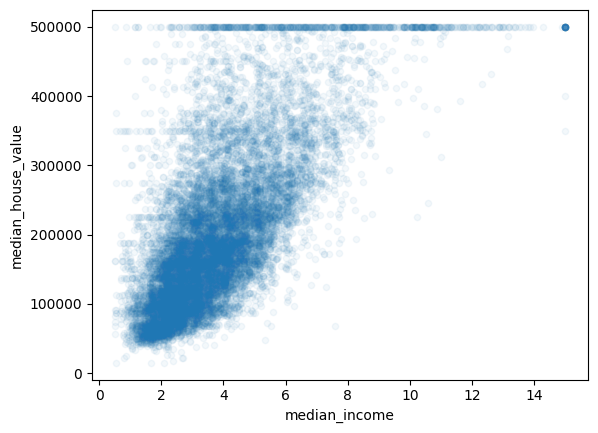

In [40]:
df_model.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.05);

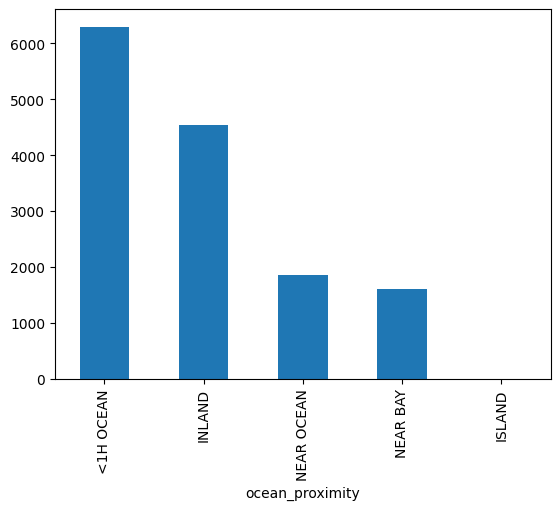

In [41]:
df_model['ocean_proximity'].value_counts().plot(kind = 'bar');

[]

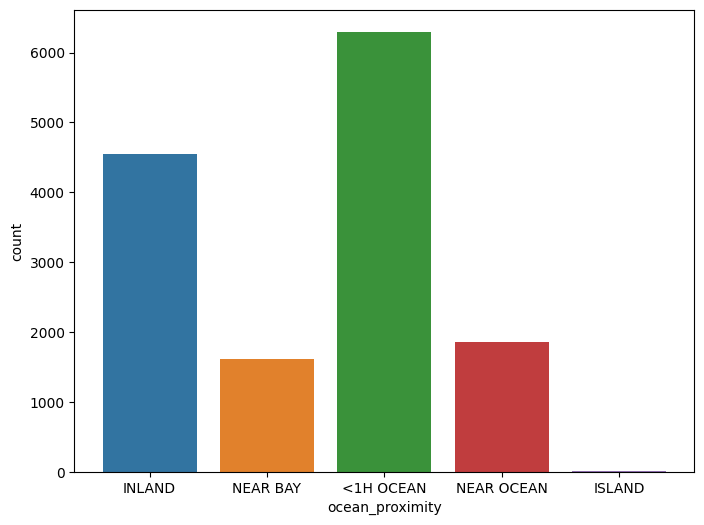

In [42]:
plt.figure(figsize = (8,6))
sns.countplot(data = df_model, x = 'ocean_proximity')
plt.plot()

In [43]:
df_model = pd.get_dummies(df_model,columns = ['ocean_proximity'])
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,False,True,False,False,False
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,False,False,False,True,False
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,True,False,False,False,False
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,True,False,False,False,False
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,False,True,False,False,False


In [44]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14311 entries, 0 to 14447
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14311 non-null  float64
 1   latitude                    14311 non-null  float64
 2   housing_median_age          14311 non-null  float64
 3   total_rooms                 14311 non-null  float64
 4   total_bedrooms              14311 non-null  float64
 5   population                  14311 non-null  float64
 6   households                  14311 non-null  float64
 7   median_income               14311 non-null  float64
 8   median_house_value          14311 non-null  float64
 9   ocean_proximity_<1H OCEAN   14311 non-null  bool   
 10  ocean_proximity_INLAND      14311 non-null  bool   
 11  ocean_proximity_ISLAND      14311 non-null  bool   
 12  ocean_proximity_NEAR BAY    14311 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  14311 no

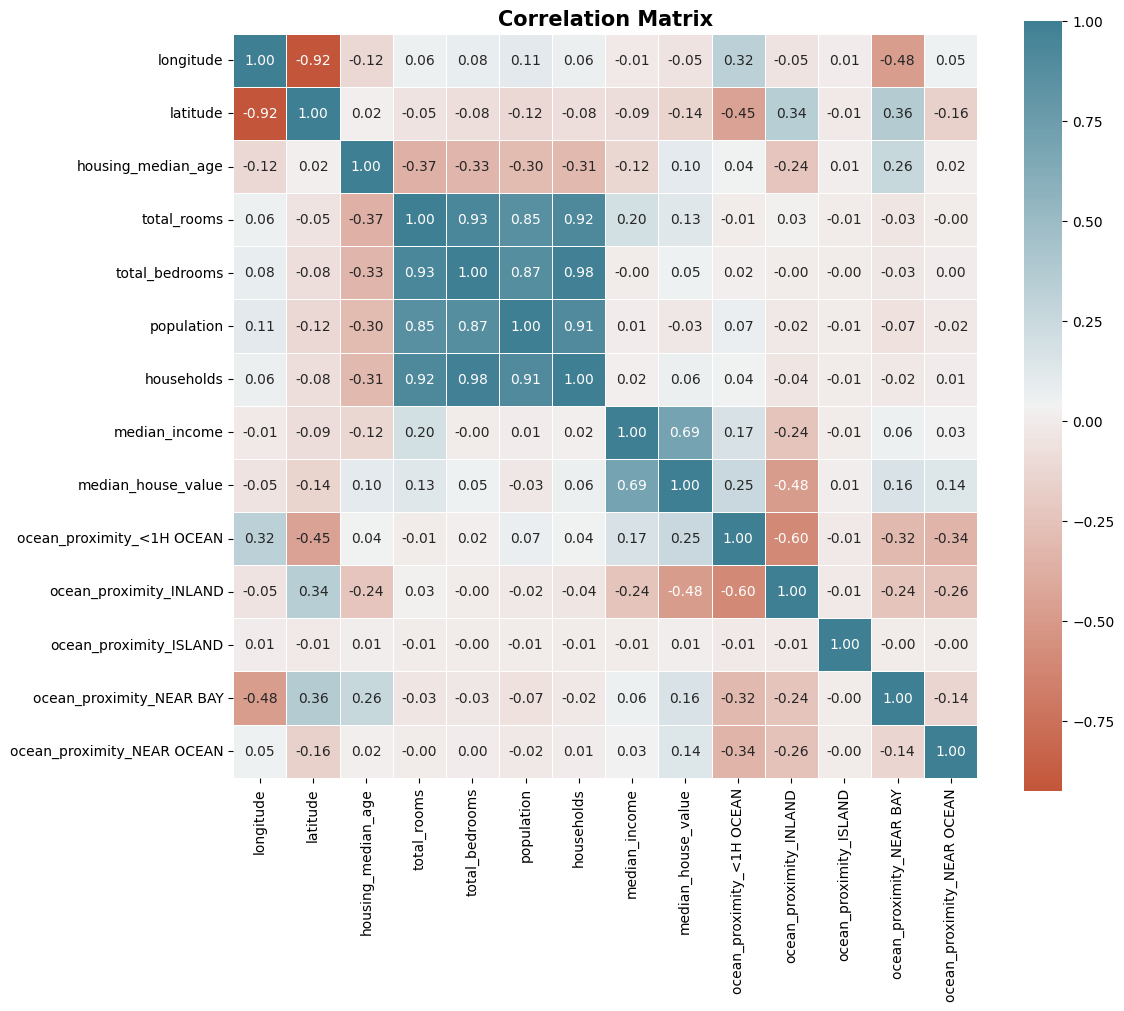

In [45]:
plt.figure(figsize = (12, 10))
palette = sns.diverging_palette(20, 220, n = 256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = palette, square = True, linewidths = 0.5)
plt.title('Correlation Matrix', size = 15, weight = 'bold');

#### From the Matrix above, we should expect that median_income has the most correlation to median_house_value. We will continue with the data train and test to see if the answer is True.

### Data Split, Train and Test Splitting

In [46]:
# Import libraries for modeling

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [47]:
x = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

In [48]:
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(len(x_train_set), len(x_test_set), len(y_train_set), len(y_test_set))

10017 4294 10017 4294


In [49]:
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'KNN Regression': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5)),
    'Decision Tree Regression': make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=5, random_state=1)),
    'Random Forest Regression': make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, max_depth=20, random_state=1)),
    'XGBoost Regression': make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, max_depth=5, random_state=1))
}

accuracy_dict = {}
for model_name, model in models.items():
    # Perform cross-validation and calculate the RMSE for each fold
    scores = cross_val_score(model, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    # Calculate the mean RMSE and std RMSE across all the folds
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    # Fit the model to the training set
    model.fit(x_train_set, y_train_set)

    # Make predictions on the test set
    pred = model.predict(x_test_set)

    # Calculate the final RMSE on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

    # Calculate MAE on the test set
    mae = mean_absolute_error(y_test_set, pred)

    # Calculate MAPE on the test set
    mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

    # Calculate Mean MAE and Std MAE across all the folds
    mean_mae = np.mean(np.abs(y_test_set - pred))
    std_mae = np.std(np.abs(y_test_set - pred))

    # Calculate Mean MAPE and Std MAPE across all the folds
    mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
    std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100

    # Store the accuracy metrics in the dictionary
    accuracy_dict[model_name] = {
        'RMSE (Test Set)': test_rmse,
        'Mean RMSE (Cross-Validation)': mean_rmse,
        'Std RMSE (Cross-Validation)': std_rmse,
        'MAE (Test Set)': mae,
        'Mean MAE (Cross-Validation)': mean_mae,
        'Std MAE (Cross-Validation)': std_mae,
        'MAPE (Test Set)': mape,
        'Mean MAPE (Cross-Validation)': mean_mape,
        'Std MAPE (Cross-Validation)': std_mape
    }

In [50]:
#Regression Libraries

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Linear Regression :

In [51]:
# Create the linear regression model pipeline
model_linear = make_pipeline(StandardScaler(), LinearRegression())

# Perform cross-validation and calculate the RMSE for each fold
scores = cross_val_score(model_linear, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Calculate the mean RMSE and std RMSE across all the folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Fit the model to the training set
model_linear.fit(x_train_set, y_train_set)

# Make predictions on the test set
pred = model_linear.predict(x_test_set)

# Calculate the final RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

# Calculate MAE on the test set
mae = mean_absolute_error(y_test_set, pred)

# Calculate MAPE on the test set
mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

# Calculate Mean MAE and Std MAE across all the folds
mean_mae = np.mean(np.abs(y_test_set - pred))
std_mae = np.std(np.abs(y_test_set - pred))

# Calculate Mean MAPE and Std MAPE across all the folds
mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100


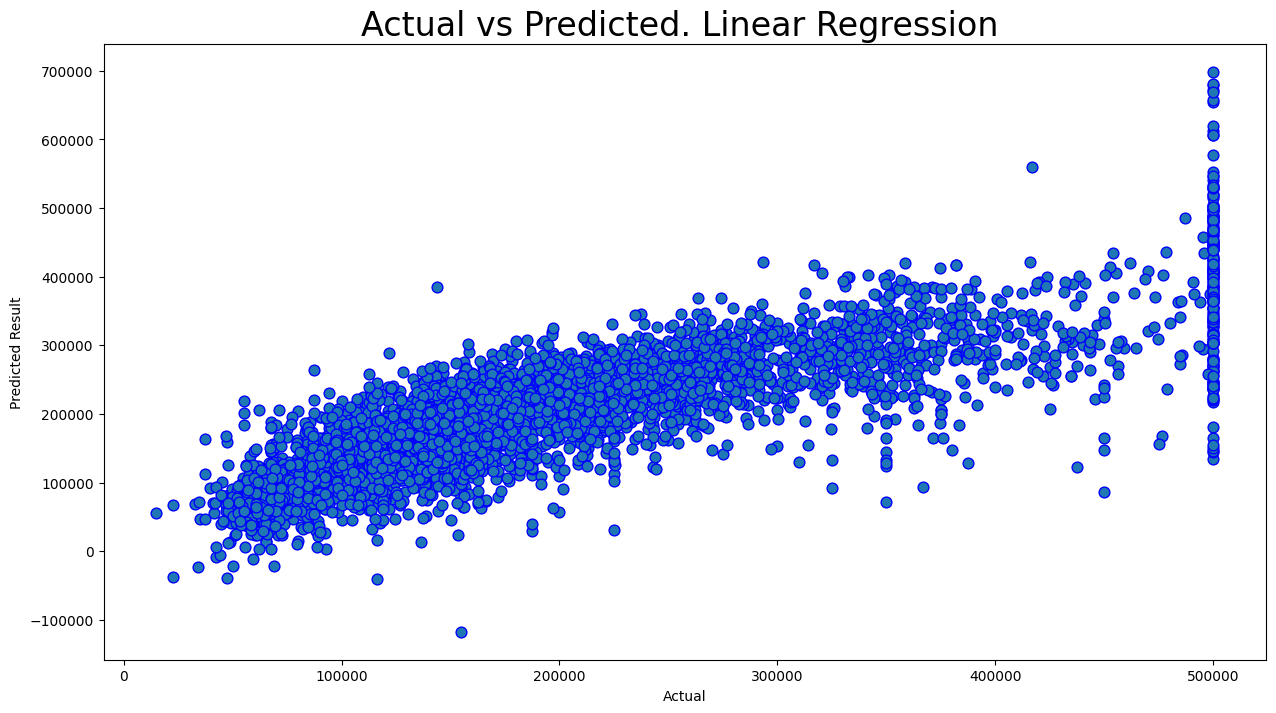

In [52]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test_set, pred, marker="o", edgecolors="b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

# Add the title to the scatter plot
plt.title("Actual vs Predicted. Linear Regression ", fontsize=24)

plt.show()

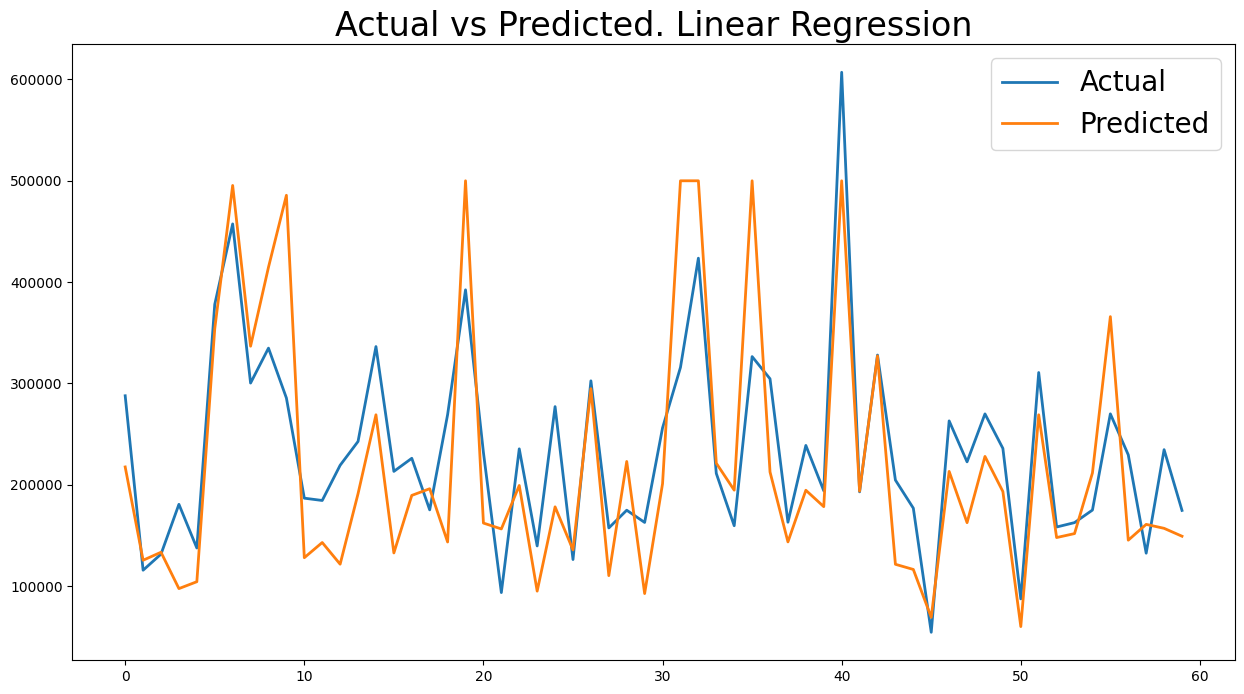

In [53]:
grp = pd.DataFrame({'prediction': pred, 'Actual': y_test_set})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)

plt.figure(figsize=(15, 8))
plt.plot(grp[:60], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Add the title to the graph
plt.title('Actual vs Predicted. Linear Regression', fontsize=24)

plt.show()

## KNN Regression :

In [54]:
# Create the KNN regression model pipeline
model_knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# Perform cross-validation and calculate the RMSE for each fold
scores = cross_val_score(model_knn, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Calculate the mean RMSE and std RMSE across all the folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Fit the model to the training set
model_knn.fit(x_train_set, y_train_set)

# Make predictions on the test set
pred = model_knn.predict(x_test_set)

# Calculate the final RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

# Calculate MAE on the test set
mae = mean_absolute_error(y_test_set, pred)

# Calculate MAPE on the test set
mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

# Calculate Mean MAE and Std MAE across all the folds
mean_mae = np.mean(np.abs(y_test_set - pred))
std_mae = np.std(np.abs(y_test_set - pred))

# Calculate Mean MAPE and Std MAPE across all the folds
mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100


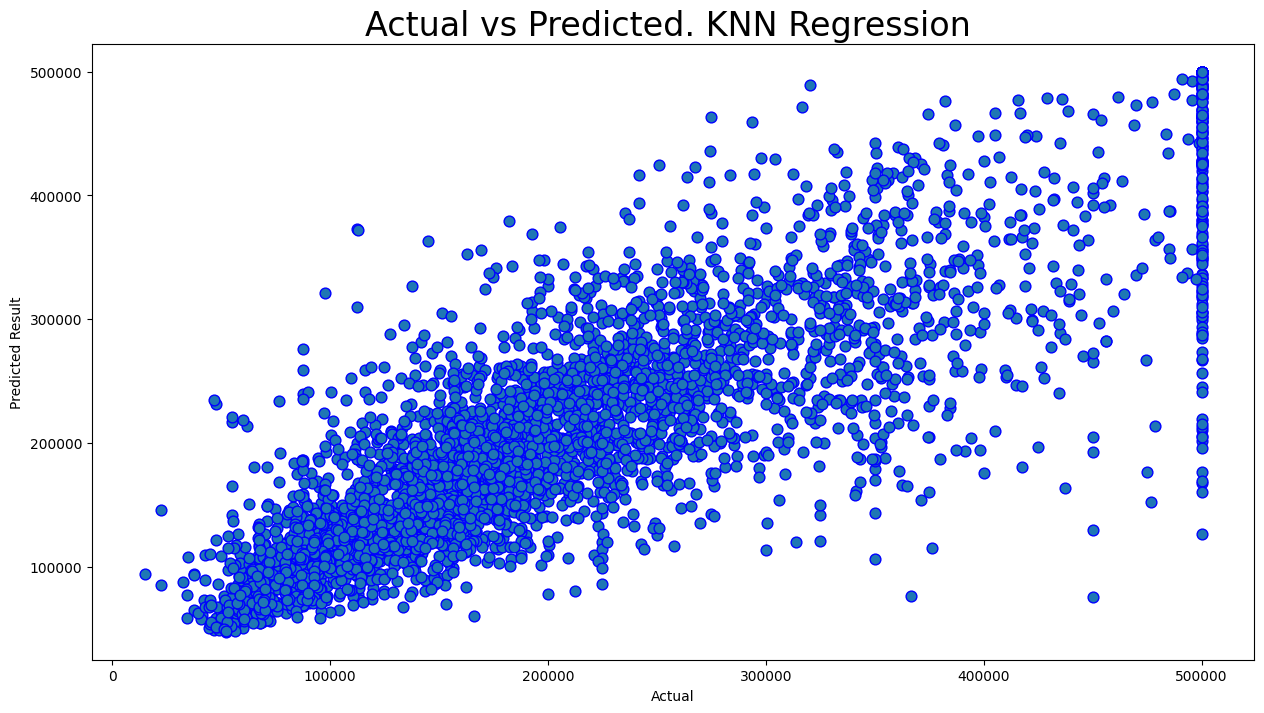

In [55]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test_set, pred, marker="o", edgecolors="b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

# Add the title to the scatter plot
plt.title("Actual vs Predicted. KNN Regression ", fontsize=24)

plt.show()

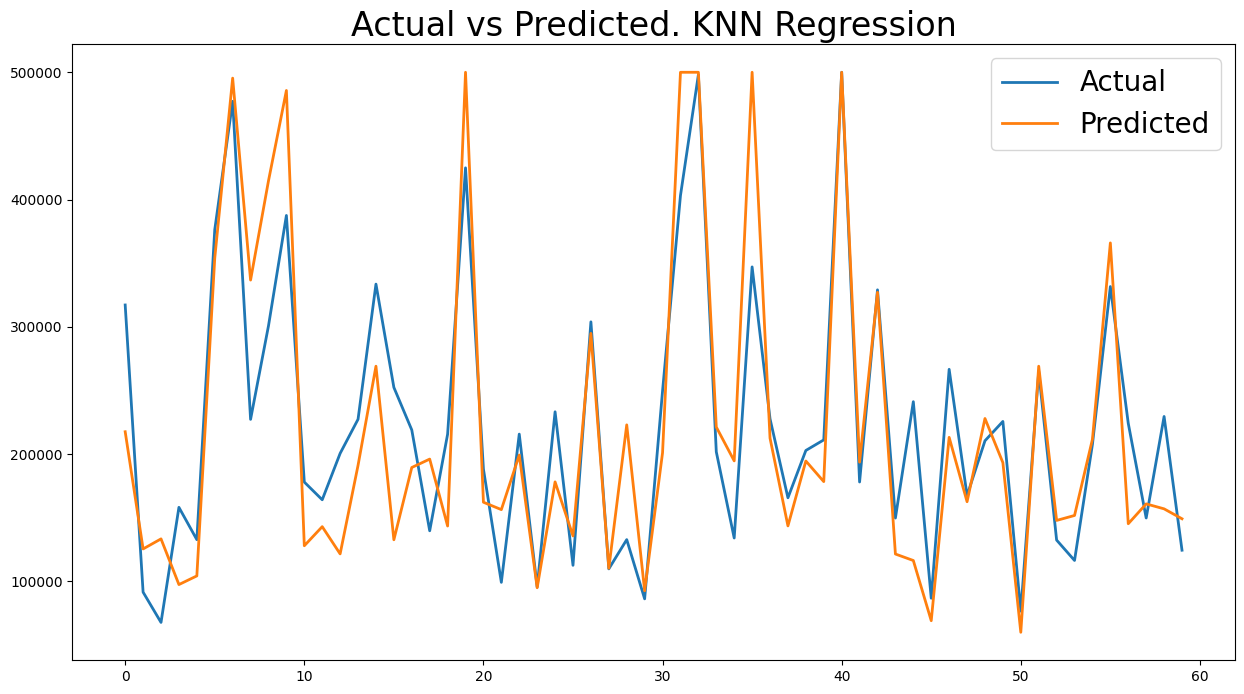

In [56]:
grp = pd.DataFrame({'prediction': pred, 'Actual': y_test_set})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)

plt.figure(figsize=(15, 8))
plt.plot(grp[:60], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Add the title to the graph
plt.title('Actual vs Predicted. KNN Regression', fontsize=24)

plt.show()

## Decision Tree Regression : 

In [57]:
# Create the Decision Tree regression model pipeline
model_decision_tree = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=20, random_state=1))

# Perform cross-validation and calculate the RMSE for each fold
scores = cross_val_score(model_decision_tree, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Calculate the mean RMSE and std RMSE across all the folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Fit the model to the training set
model_decision_tree.fit(x_train_set, y_train_set)

# Make predictions on the test set
pred = model_decision_tree.predict(x_test_set)

# Calculate the final RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

# Calculate MAE on the test set
mae = mean_absolute_error(y_test_set, pred)

# Calculate MAPE on the test set
mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

# Calculate Mean MAE and Std MAE across all the folds
mean_mae = np.mean(np.abs(y_test_set - pred))
std_mae = np.std(np.abs(y_test_set - pred))

# Calculate Mean MAPE and Std MAPE across all the folds
mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100

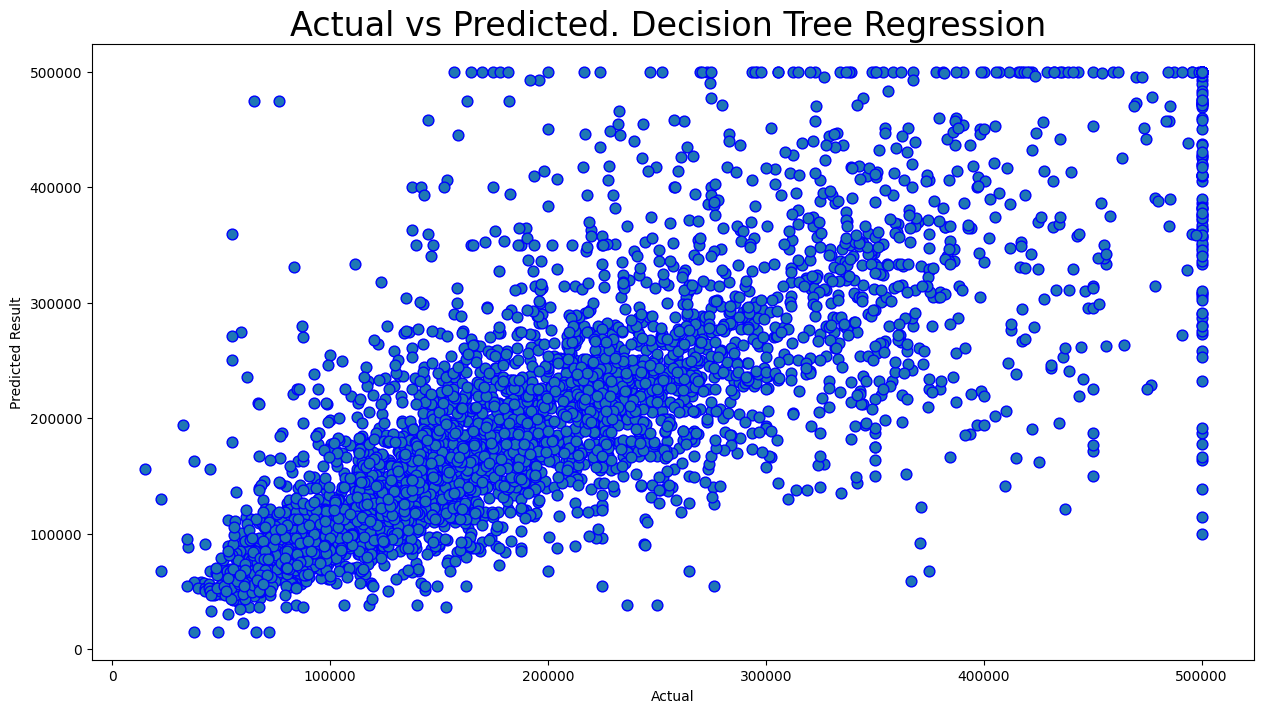

In [58]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test_set, pred, marker="o", edgecolors="b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

# Add the title to the scatter plot
plt.title("Actual vs Predicted. Decision Tree Regression ", fontsize=24)

plt.show()

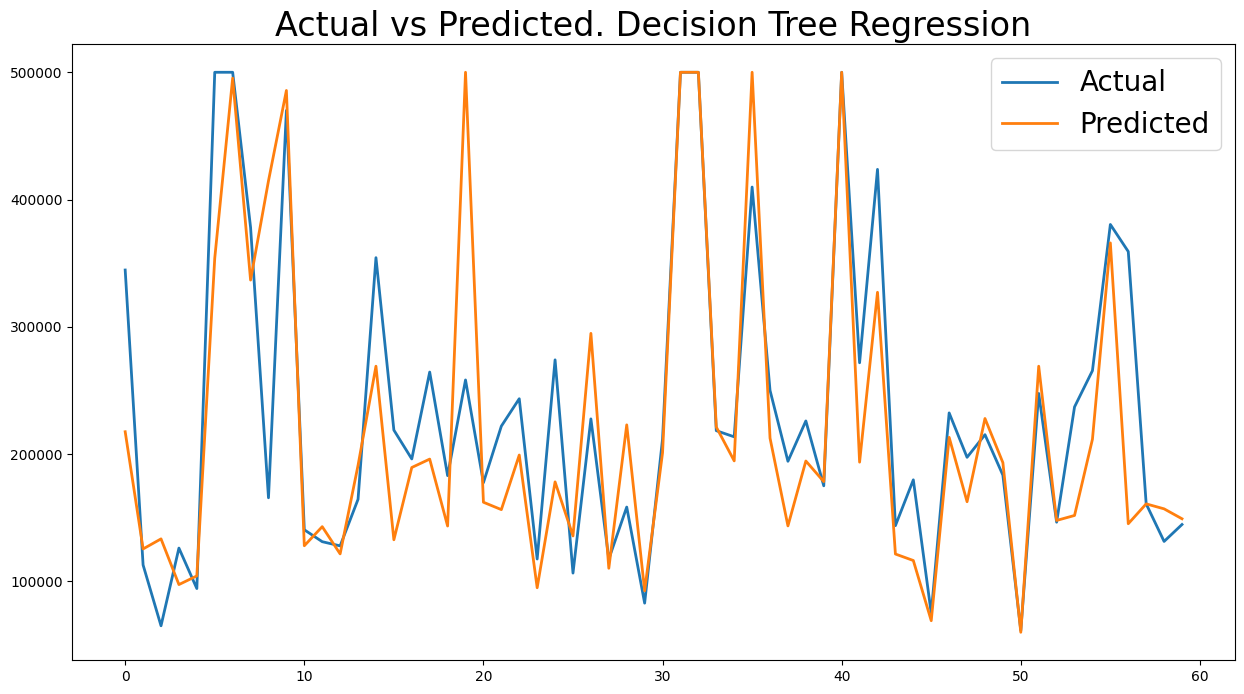

In [59]:
grp = pd.DataFrame({'prediction': pred, 'Actual': y_test_set})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)

plt.figure(figsize=(15, 8))
plt.plot(grp[:60], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Add the title to the graph
plt.title('Actual vs Predicted. Decision Tree Regression', fontsize=24)

plt.show()

## Random Forest Regression : 

In [60]:
# Create the Random Forest regression model pipeline
model_random_forest = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, max_depth=20, random_state=1))

# Perform cross-validation and calculate the RMSE for each fold
scores = cross_val_score(model_random_forest, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Calculate the mean RMSE and std RMSE across all the folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Fit the model to the training set
model_random_forest.fit(x_train_set, y_train_set)

# Make predictions on the test set
pred = model_random_forest.predict(x_test_set)

# Calculate the final RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

# Calculate MAE on the test set
mae = mean_absolute_error(y_test_set, pred)

# Calculate MAPE on the test set
mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

# Calculate Mean MAE and Std MAE across all the folds
mean_mae = np.mean(np.abs(y_test_set - pred))
std_mae = np.std(np.abs(y_test_set - pred))

# Calculate Mean MAPE and Std MAPE across all the folds
mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100


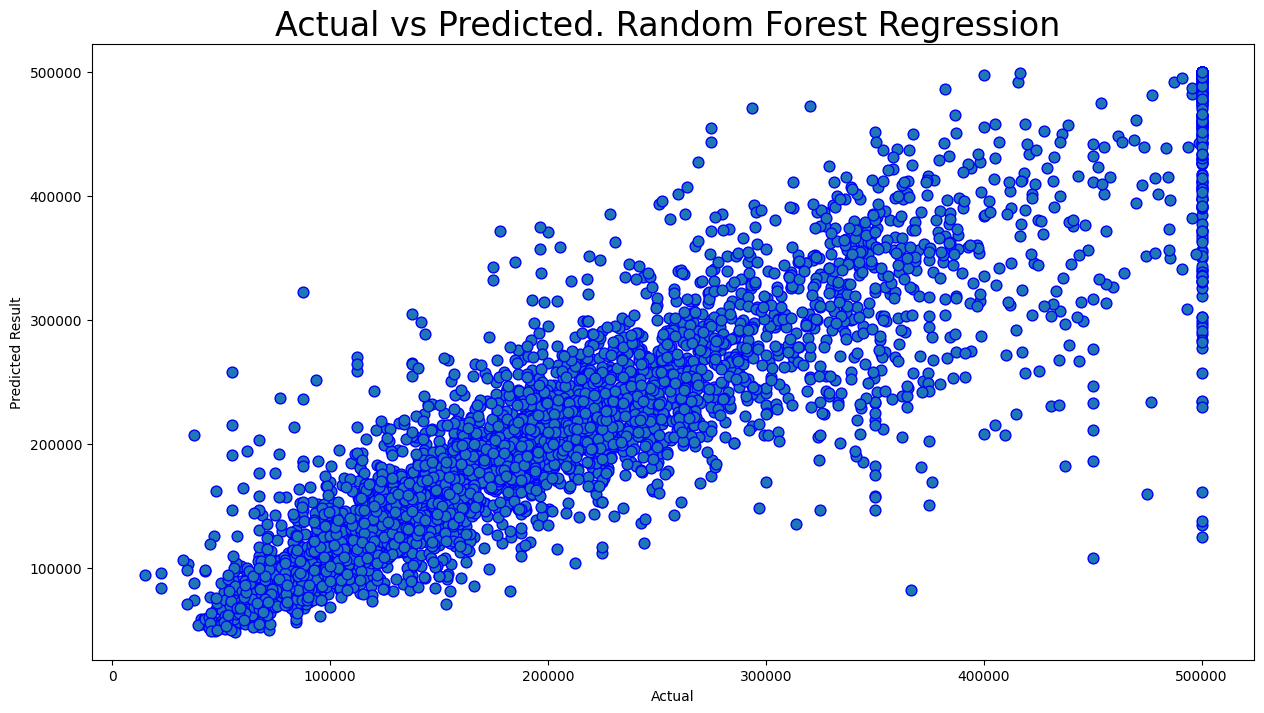

In [61]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test_set, pred, marker="o", edgecolors="b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

# Add the title to the scatter plot
plt.title("Actual vs Predicted. Random Forest Regression ", fontsize=24)

plt.show()

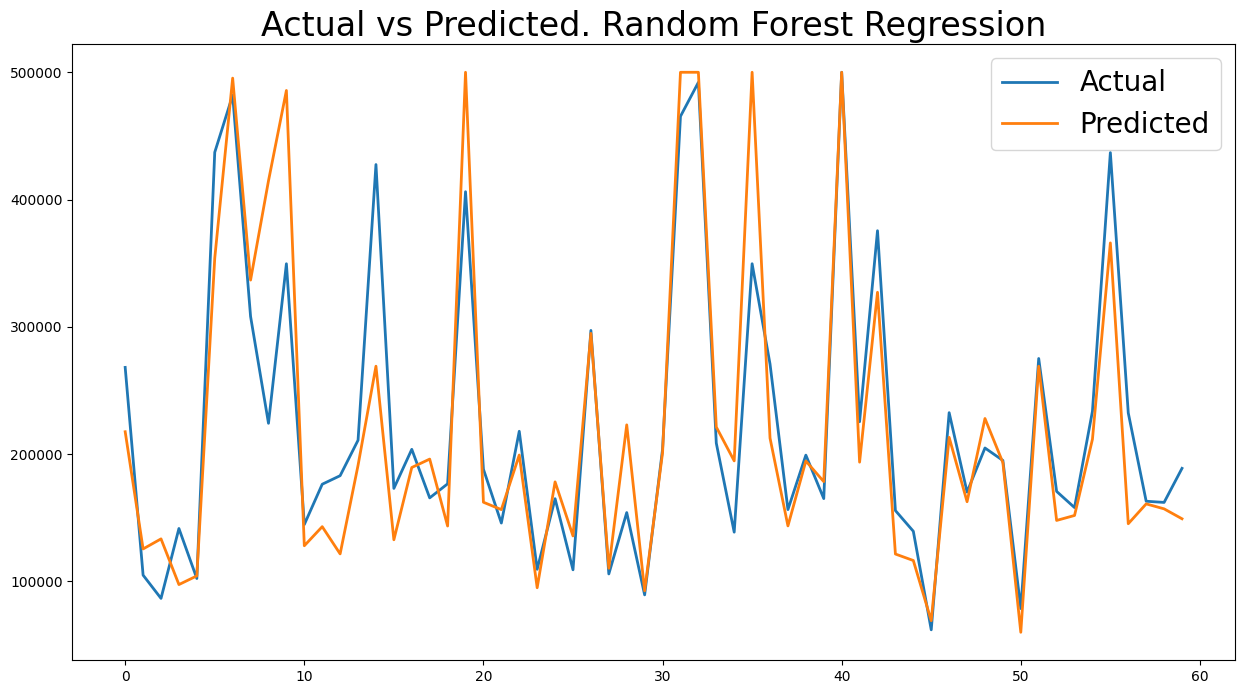

In [62]:
grp = pd.DataFrame({'prediction': pred, 'Actual': y_test_set})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)

plt.figure(figsize=(15, 8))
plt.plot(grp[:60], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Add the title to the graph
plt.title('Actual vs Predicted. Random Forest Regression', fontsize=24)

plt.show()

## XGBoost Regression : 

In [63]:
# import xgboost as xgb
# xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 1, eta = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 2000)
# model_xgb = make_pipeline(preprocessing.StandardScaler(), xg_reg)
# scores = cross_val_score(model_xgb, x_train_set, y_train_set, cv = 10)
# model_xgb.fit(x_train_set, y_train_set)
# pred = model_xgb.predict(x_test_set)
# RMSE = np.sqrt(mean_squared_error(y_test_set, pred))
# MAE = mean_absolute_error(y_test_set, pred)
# MAPE = np.mean(np.abs(y_test_set - pred) / (y_test_set))*100

# test['XGB Regression'] = (RMSE, MAE, MAPE)
# print('RMSE for XGBoost Regression : ', RMSE)
# print('MAE for XGBoost Regression : ', MAE)
# print('MAPE for XGBoost Regression : ', MAPE)

In [64]:
# Create the XGBoost regression model pipeline
model_xgboost = make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, max_depth=5, random_state=1))

# Perform cross-validation and calculate the RMSE for each fold
scores = cross_val_score(model_xgboost, x_train_set, y_train_set, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Calculate the mean RMSE and std RMSE across all the folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Fit the model to the training set
model_xgboost.fit(x_train_set, y_train_set)

# Make predictions on the test set
pred = model_xgboost.predict(x_test_set)

# Calculate the final RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_set, pred))

# Calculate MAE on the test set
mae = mean_absolute_error(y_test_set, pred)

# Calculate MAPE on the test set
mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100

# Calculate Mean MAE and Std MAE across all the folds
mean_mae = np.mean(np.abs(y_test_set - pred))
std_mae = np.std(np.abs(y_test_set - pred))

# Calculate Mean MAPE and Std MAPE across all the folds
mean_mape = np.mean(np.abs((y_test_set - pred) / y_test_set)) * 100
std_mape = np.std(np.abs((y_test_set - pred) / y_test_set)) * 100

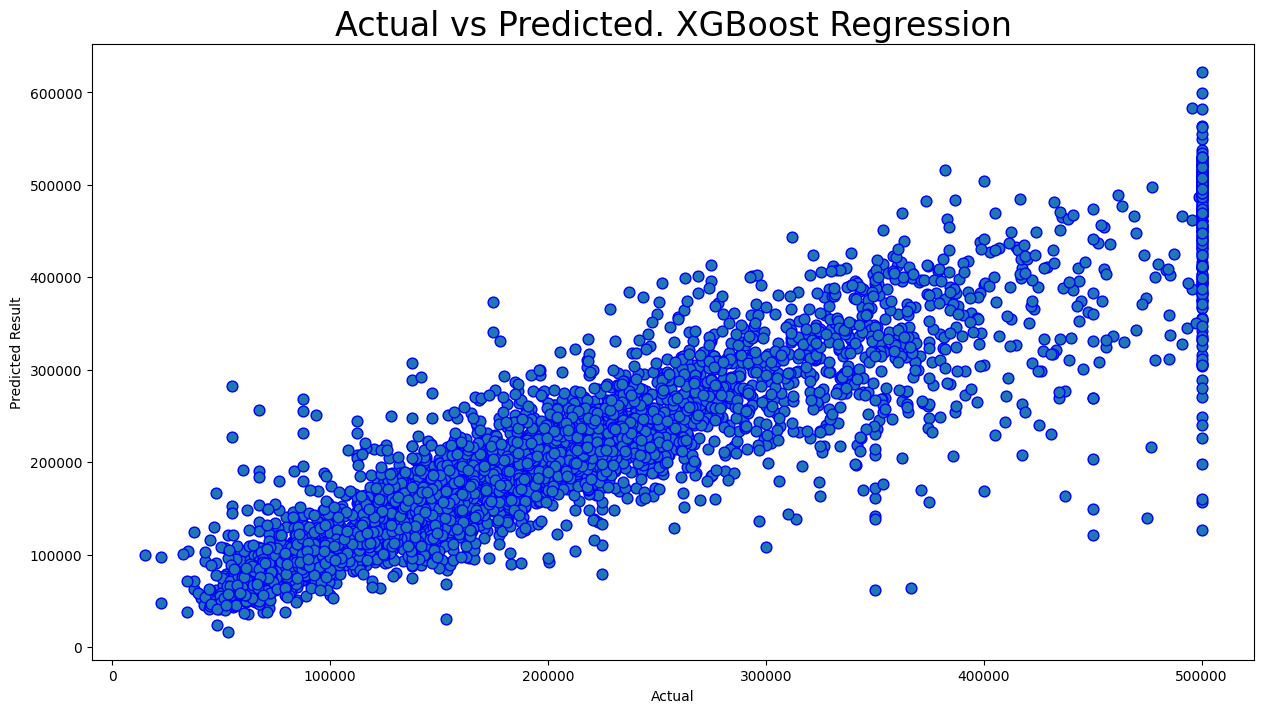

In [65]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test_set, pred, marker="o", edgecolors="b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

# Add the title to the scatter plot
plt.title("Actual vs Predicted. XGBoost Regression", fontsize=24)

plt.show()

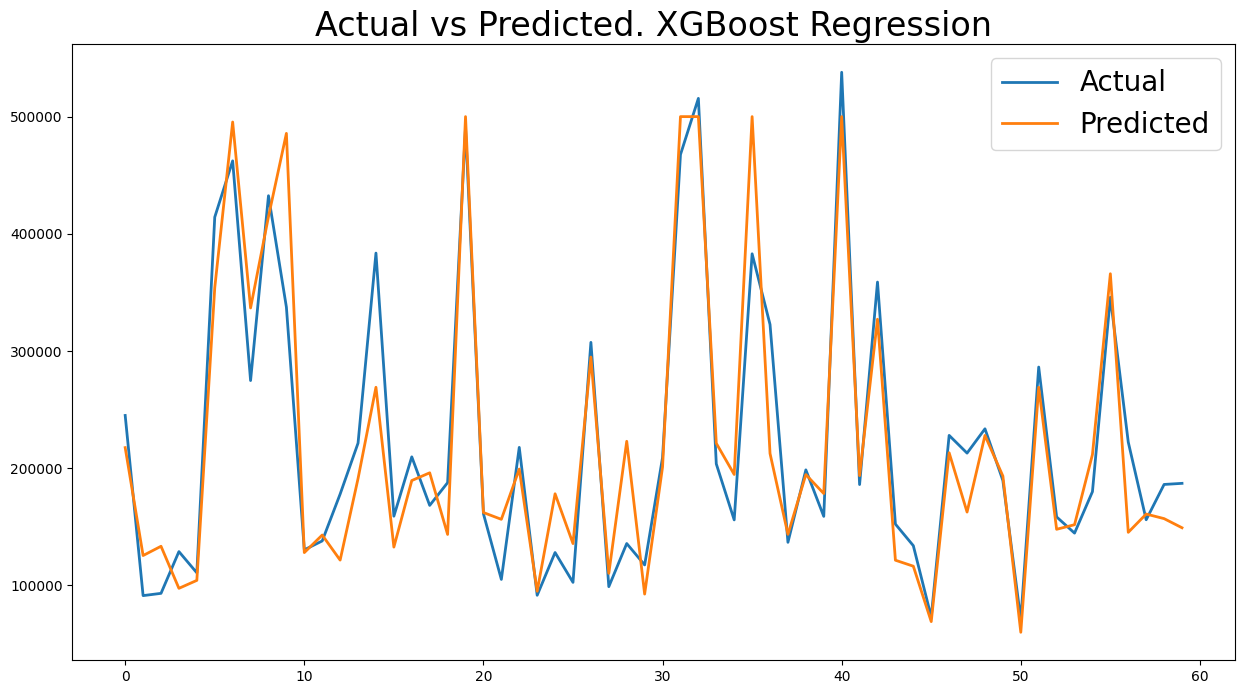

In [66]:
grp = pd.DataFrame({'prediction': pred, 'Actual': y_test_set})
grp = grp.reset_index()
grp = grp.drop(['index'], axis=1)

plt.figure(figsize=(15, 8))
plt.plot(grp[:60], linewidth=2)
plt.legend(['Actual', 'Predicted'], prop={'size': 20})

# Add the title to the graph
plt.title('Actual vs Predicted. XGBoost Regression', fontsize=24)

plt.show()

In [67]:
# Convert the dictionary to a DataFrame
accuracy_model = pd.DataFrame(accuracy_dict)

# Display the DataFrame
accuracy_model = accuracy_model.T
accuracy_model


,RMSE (Test Set),Mean RMSE (Cross-Validation),Std RMSE (Cross-Validation),MAE (Test Set),Mean MAE (Cross-Validation),Std MAE (Cross-Validation),MAPE (Test Set),Mean MAPE (Cross-Validation),Std MAPE (Cross-Validation)
Linear Regression,66533.569127,69651.870622,2388.108054,48653.882617,48653.882617,45381.885450,28.216589,28.216589,27.533252
KNN Regression,61605.185252,62549.577999,1985.474988,41889.086213,41889.086213,45171.930512,22.975146,22.975146,28.421416
Decision Tree Regression,70073.933879,71208.959875,2564.794236,50030.396109,50030.396109,49064.403333,28.393169,28.393169,30.825402
Random Forest Regression,50020.489665,50875.870599,2343.744862,32676.961644,32676.961644,37871.698721,18.121231,18.121231,24.636145
XGBoost Regression,48741.733819,49435.443830,2496.600156,32337.475895,32337.475895,36469.771982,17.920787,17.920787,23.468279


#### If we see the value displayed above, we can conclude that XGBoost Regression Model works better than the rest of the model, so we will continue with the XGBoost Model

## Hyperparameter Tuning : XGBoost 

In [68]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


# Create the XGBoost regression model pipeline
model_xgboost = make_pipeline(StandardScaler(), XGBRegressor(random_state=1))

# Define hyperparameters and their values for tuning
param_grid = {
    'xgbregressor__n_estimators': [10, 50, 100],  # Number of boosting rounds
    'xgbregressor__max_depth': [1, 5, 10],          # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.01]     # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train_set, y_train_set)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost model with the best hyperparameters
best_model_xgboost = make_pipeline(StandardScaler(), XGBRegressor(random_state=1, **best_params))

# Fit the best model on the training data
best_model_xgboost.fit(x_train_set, y_train_set)

# Make predictions on the test set using the best model
pred = best_model_xgboost.predict(x_test_set)

# Calculate the final RMSE on the test set using the best model
test_rmse_tuned = np.sqrt(mean_squared_error(y_test_set, pred))

print("Best Hyperparameters:", best_params)
print("Best Model RMSE (Test Set):", test_rmse_tuned)


[19:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

Best Hyperparameters: {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 10, 'xgbregressor__n_estimators': 100}
Best Model RMSE (Test Set): 48373.84744621406


In [69]:
# Fit the initial XGBoost model on the training data
model_xgboost.fit(x_train_set, y_train_set)

# Make predictions on the test set using the initial model
pred_initial = model_xgboost.predict(x_test_set)

# Calculate the RMSE on the test set for the initial model
rmse_initial = np.sqrt(mean_squared_error(y_test_set, pred_initial))

# Calculate MAE on the test set for the initial model
mae_initial = mean_absolute_error(y_test_set, pred_initial)

# Calculate MAPE on the test set for the initial model
mape_initial = mean_absolute_percentage_error(y_test_set, pred_initial) * 100

# Make predictions on the test set using the tuned XGBoost model (already done in the previous code)
pred_tuned = best_model_xgboost.predict(x_test_set)

# Calculate the RMSE on the test set for the tuned model (already done in the previous code)
rmse_tuned = test_rmse_tuned

# Calculate MAE on the test set for the tuned model
mae_tuned = mean_absolute_error(y_test_set, pred_tuned)

# Calculate MAPE on the test set for the tuned model
mape_tuned = mean_absolute_percentage_error(y_test_set, pred_tuned) * 100

# Display the results
print("Initial XGBoost Model:")
print("RMSE:", test_rmse)
print("MAE:", mae)
print("MAPE:", mape)

print("\nTuned XGBoost Model:")
print("RMSE:", rmse_tuned)
print("MAE:", mae_tuned)
print("MAPE:", mape_tuned)


Initial XGBoost Model:
RMSE: 48741.73381910216
MAE: 32337.47589523536
MAPE: 17.92078735160464

Tuned XGBoost Model:
RMSE: 48373.84744621406
MAE: 32214.3314867948
MAPE: 17.913151653059696


#### From the value above, we can conclude that the model performance has improved because the value of RMSE, MAE, and MAPE from the Tuned XGBoost model is smaller than the Initial XGBoost model 


## Feature Importance
#### To find out which features affect the price, we can check it with feature importance function

[19:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.



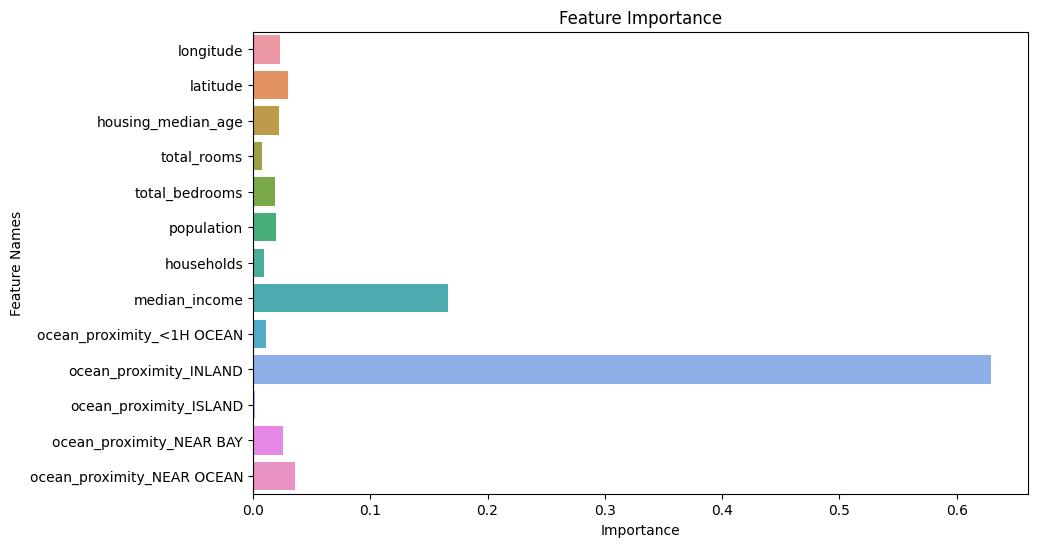

In [70]:
# Create the XGBoost regression model pipeline
model_xgboost = make_pipeline(StandardScaler(), XGBRegressor(random_state=1))

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train_set, y_train_set)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost model with the best hyperparameters
best_model_xgboost = make_pipeline(StandardScaler(), XGBRegressor(random_state=1, **best_params))

# Fit the best model on the training data
best_model_xgboost.fit(x_train_set, y_train_set)

# Get the feature names from the dataset
feature_names = x_train_set.columns.tolist()

# Plot feature importance with actual feature names
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model_xgboost['xgbregressor'].feature_importances_, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()


Ocean_proximity_INLAND and median_income are the top 2 important features that affects the price.

## `Conclusion`

#### According to the modelling that has been done, we can conclude that the location of the house is the most influental features on the price and the median_income came second. 
#### At first, our prediction would be a house near the ocean will have a higher affection towards the price rather than a house that is away from the ocean. But after some modelling, it is shown that unexpectedly, a house that located away from the ocean affects the price more rather than a house located near the ocean. 
#### The second most influental features to the price is none other than the income influence or median_income. For this data, it is not very surprising because as areas with higher income levels often have higher housing prices. 
#### The evaluation metrics used are RMSE, MAE & MAPE. From the MAPE value produced by the XGBoost Model after hyperparameter tuning is 17.91% which is better than before hyperparameter tuning although the increase is slightly. Which means that our model estimated price will be missed about 17.91% from the actual price of the house. 



## `Recommendations`

#### For things that could be done to improve the model are :
#### - Collecting More Data
    Gather more data to increase the size of the dataset. More data can help the model learn better patterns and improve performance. Such as crime rate in each area. 
#### - Update the Data Frequently
    If the housing dataset changes overtime, update the dataset regularly to keep the model up-to-date and relevant so it can generate a more suitable and reasonable value for the real estate. 
    

## Save Model Pickle

In [76]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Create the XGBoost regression model pipeline with preprocessing steps
preprocess = Pipeline([
    # Add your preprocessing steps here
    ('scaler', StandardScaler()),  # For example, using StandardScaler for feature scaling
])

model_xgboost = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBRegressor(random_state=1))
])

# Fit the pipeline on the training data
model_xgboost.fit(x_train_set, y_train_set)

# Save the model using Pickle
filename = 'Model_California_House_Price_XGB.sav'
pickle.dump(model_xgboost, open(filename, 'wb'))

print("Model saved successfully as", filename)



Model saved successfully as Model_California_House_Price_XGB.sav


## Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

#### Now you can use 'loaded_model' for making predictions or other tasks

